In [ ]:
#파일 불러오기
from google.colab import files
files.upload()

Saving vgames2.csv to vgames2 (1).csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [ ]:
#vgames2데이터 확인
import pandas as pd
import numpy as np
game=pd.read_csv('vgames2.csv')
game=game.drop(['Unnamed: 0'],axis=1)

#year이 1900 보다 작을 경우 데이터 제외시킴
#Year 비어있는 행 제외
condition = game.loc[(game['Year']<1900)].index
game= game.drop(condition)
game['Year'].replace('',np.nan, inplace=True)
game.dropna(subset=['Year'],inplace=True)

#'Genre'에서 비어있는값 제외('Platform'에는 비어있는 값 없었음)
game['Genre'].isnull().sum()
game['Genre'].replace('', np.nan, inplace=True)
game.dropna(subset=['Genre'], inplace=True)

#col=['Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
game=game.reset_index(drop=True)



In [ ]:
# M단위 없애주기
game['NA_Sales'] = game['NA_Sales'].str.replace('M','')
game['EU_Sales'] = game['EU_Sales'].str.replace('M','')
game['JP_Sales'] = game['JP_Sales'].str.replace('M','')
game['Other_Sales'] = game['Other_Sales'].str.replace('M','')

#K값을 비정상적으로 크게 만들어주기
game['NA_Sales'] = game['NA_Sales'].str.replace('K','000000000')
game['EU_Sales'] = game['EU_Sales'].str.replace('K','000000000')
game['JP_Sales'] = game['JP_Sales'].str.replace('K','000000000')
game['Other_Sales'] = game['Other_Sales'].str.replace('K','000000000')

#값을 str 에서 float로 바꿔주기
game['NA_Sales'] = game['NA_Sales'].astype(float)
game['EU_Sales'] = game['EU_Sales'].astype(float)
game['JP_Sales'] = game['JP_Sales'].astype(float)
game['Other_Sales'] = game['Other_Sales'].astype(float)

#단위를 K로 바꿔주기
game['NA_Sales'] = game['NA_Sales'].multiply(1000)
game['EU_Sales'] = game['EU_Sales'].multiply(1000)
game['JP_Sales'] = game['JP_Sales'].multiply(1000)
game['Other_Sales'] = game['Other_Sales'].multiply(1000)

game.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16177 entries, 0 to 16176
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16177 non-null  object 
 1   Platform     16177 non-null  object 
 2   Year         16177 non-null  float64
 3   Genre        16177 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16177 non-null  float64
 6   EU_Sales     16177 non-null  float64
 7   JP_Sales     16177 non-null  float64
 8   Other_Sales  16177 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [ ]:
# K를 1000000000으로 바꿔주면서 생긴 비정상적인 값들 원상복귀!
index=game.index
for i in range(0,16177):
  if game['NA_Sales'][i]>1000000000:
    game['NA_Sales'][i]=game['NA_Sales'][i]/1000000000000
  else:
    game['NA_Sales'][i]=game['NA_Sales'][i]
  if game['EU_Sales'][i]>1000000000:
    game['EU_Sales'][i]=game['EU_Sales'][i]/1000000000000
  else:
    game['EU_Sales'][i]=game['EU_Sales'][i]
  if game['JP_Sales'][i]>1000000000:
    game['JP_Sales'][i]=game['JP_Sales'][i]/1000000000000
  else:
    game['JP_Sales'][i]=game['JP_Sales'][i]
  if game['Other_Sales'][i]>1000000000:
    game['Other_Sales'][i]=game['Other_Sales'][i]/1000000000000
  else:
    game['Other_Sales'][i]=game['Other_Sales'][i]


game['Year']=game['Year'].astype(int)
                    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/

In [ ]:
#장르별 그룹 만들어보기
genre=game.groupby(game['Genre']).sum()

game.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

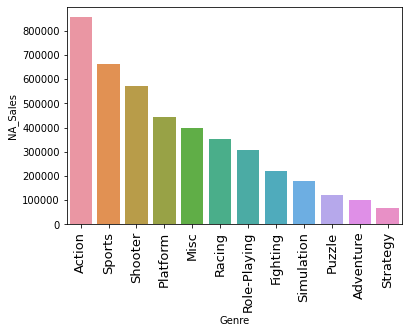

In [ ]:
#지역별 선호하는 게임장르(연도이상한거 안 없애줘도 1,2,3순위는 같음!)
import seaborn as sns
import matplotlib.pyplot as plt

NA=genre.sort_values(by='NA_Sales', ascending=False)#Action,Sports,Shooter
EU=genre.sort_values(by='EU_Sales', ascending=False)#Action,Sports,Shooter
JP=genre.sort_values(by='JP_Sales', ascending=False)#Role-Playing,Action,Sports
OT=genre.sort_values(by='Other_Sales', ascending=False)#Action,Sports,Shooter

plt.xticks(rotation=90)
sns.barplot(data=NA,x=NA.index,y='NA_Sales')
plt.xticks(fontsize=13)




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

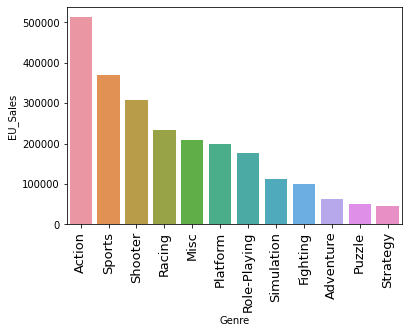

In [ ]:
plt.xticks(rotation=90)
sns.barplot(data=EU,x=EU.index,y='EU_Sales')
plt.xticks(fontsize=13)

                 Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                           
Role-Playing  2926271  307080.0  176320.0  336250.0      54710.0
Action        6481546  855990.0  512520.0  155740.0     183640.0
Sports        4590560  664330.0  369690.0  134580.0     131730.0
Platform      1735332  442460.0  199420.0  129220.0      51150.0
Misc          3402276  399850.0  209730.0  103710.0      72640.0
Fighting      1661830  220110.0   99720.0   86390.0      36100.0
Simulation    1693534  181040.0  112860.0   63460.0      31240.0
Puzzle        1120906  121000.0   50400.0   56190.0      12390.0
Racing        2425871  353570.0  234210.0   55420.0      76230.0
Adventure     2542300  101460.0   63370.0   51810.0      16640.0
Strategy      1333738   67880.0   44800.0   48130.0      11200.0
Shooter       2543486  570890.0  307260.0   37340.0     100820.0


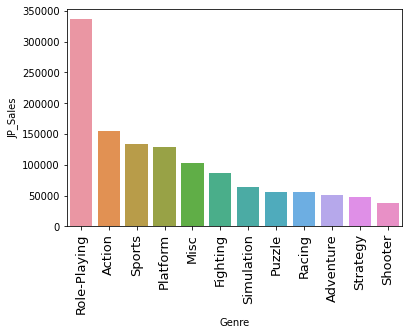

In [ ]:
plt.xticks(rotation=90)
sns.barplot(data=JP,x=JP.index,y='JP_Sales')
plt.xticks(fontsize=13)

print(JP)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

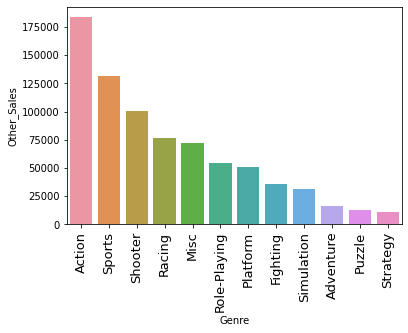

In [ ]:
plt.xticks(rotation=90)
sns.barplot(data=OT,x=OT.index,y='Other_Sales')
plt.xticks(fontsize=13)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


([<matplotlib.patches.Wedge object at 0x7f9f6b6dac50>, <matplotlib.patches.Wedge object at 0x7f9f6b626e50>, <matplotlib.patches.Wedge object at 0x7f9f6b6f19d0>, <matplotlib.patches.Wedge object at 0x7f9f6b6c6550>, <matplotlib.patches.Wedge object at 0x7f9f6b169c10>, <matplotlib.patches.Wedge object at 0x7f9f6b6d3dd0>, <matplotlib.patches.Wedge object at 0x7f9f6b6d30d0>, <matplotlib.patches.Wedge object at 0x7f9f6b213590>, <matplotlib.patches.Wedge object at 0x7f9f6b1decd0>], [Text(0.5304428407230645, 0.9636547061710672, 'Platform'), Text(-0.9667020705782865, 0.5248686566557902, 'Puzzle'), Text(-0.9885226452599721, -0.4825173362773898, 'Shooter'), Text(-0.2705284938263153, -1.0662149567643784, 'Action'), Text(0.45666691196764353, -1.000727401200715, 'Sports'), Text(0.8083143303211503, -0.7460750253141238, 'Role-Playing'), Text(0.9841237828489672, -0.49142688167319365, 'Racing'), Text(1.061667023277526, -0.2878595693824284, 'Misc'), Text(1.0943785664295274, -0.11106553623718225, 'etc')],

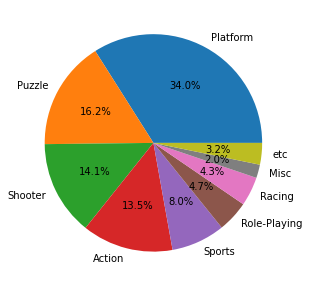

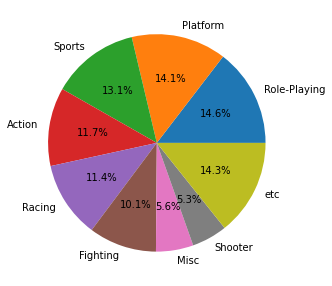

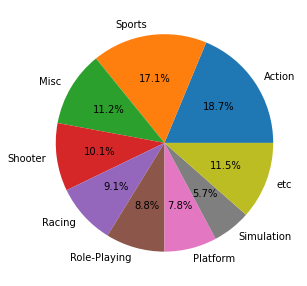

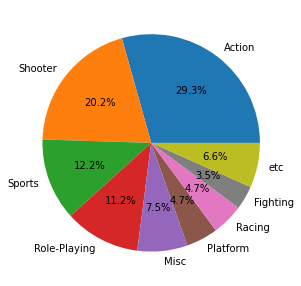

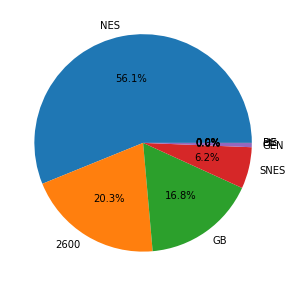

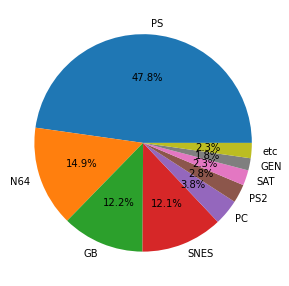

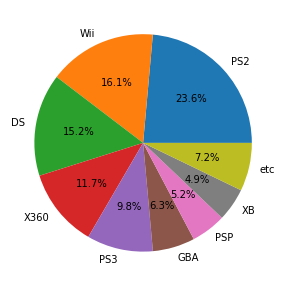

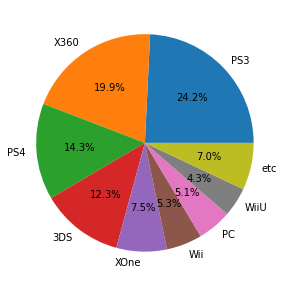

In [ ]:
#연도별 게임 트렌드(1980-1990,1991-2000,2001-2010,2011-2020)

from pandas import DataFrame

#Total 만들기
game_NA=game[['Year','Genre','Platform','NA_Sales','EU_Sales','JP_Sales',
              'Other_Sales']]
game_NA['Total']=game_NA['NA_Sales']+game_NA['EU_Sales']+game_NA['JP_Sales']+game_NA['Other_Sales']

##1980-1990
condition_NA_1= game_NA.loc[(game_NA['Year']>1990)].index#1980-1990
game_NA_1= game_NA.drop(condition_NA_1)
game_NA_1_G=game_NA_1.groupby(['Genre'])['Total'].sum()
game_NA_1_G=DataFrame(data=game_NA_1_G,columns=['Total'])
game_NA_1_P=game_NA_1.groupby(['Platform'])['Total'].sum()
game_NA_1_P=DataFrame(data=game_NA_1_P,columns=['Total'])

##1991-2000
condition_NA_2= game_NA.loc[(game_NA['Year']>2000)|(game_NA['Year']<1991)].index
game_NA_2= game_NA.drop(condition_NA_2)
game_NA_2_G=game_NA_2.groupby(['Genre'])['Total'].sum()
game_NA_2_G=DataFrame(data=game_NA_2_G,columns=['Total'])
game_NA_2_P=game_NA_2.groupby(['Platform'])['Total'].sum()
game_NA_2_P=DataFrame(data=game_NA_2_P,columns=['Total'])


##2001-2010
condition_NA_3= game_NA.loc[(game_NA['Year']>2010)|(game_NA['Year']<2001)].index
game_NA_3= game_NA.drop(condition_NA_3)
game_NA_3_G=game_NA_3.groupby(['Genre'])['Total'].sum()
game_NA_3_G=DataFrame(data=game_NA_3_G,columns=['Total'])
game_NA_3_P=game_NA_3.groupby(['Platform'])['Total'].sum()
game_NA_3_P=DataFrame(data=game_NA_3_P,columns=['Total'])


##2011-2020
condition_NA_4= game_NA.loc[(game_NA['Year']>2020)|(game_NA['Year']<2011)].index
game_NA_4= game_NA.drop(condition_NA_4)
game_NA_4_G=game_NA_4.groupby(['Genre'])['Total'].sum()
game_NA_4_G=DataFrame(data=game_NA_4_G,columns=['Total'])
game_NA_4_P=game_NA_4.groupby(['Platform'])['Total'].sum()
game_NA_4_P=DataFrame(data=game_NA_4_P,columns=['Total'])


def pie(data):
  data=data.sort_values(by='Total', ascending=False)
  etc=data['Total'][8:12]
  etc_G=data.index[8:12]
  etc=etc.sum()
  data.loc['etc']=[etc]
  data=data.drop(etc_G)
  plt.figure(figsize=(5,5))
  return plt.pie(data,
                 labels=data.index,
                 autopct='%1.1f%%')
  
def pie2(data):
  data=data.sort_values(by='Total', ascending=False)
  etc=data['Total'][8:]
  etc_P=data.index[8:]
  etc=etc.sum()
  data.loc['etc']=[etc]
  data=data.drop(etc_P)
  plt.figure(figsize=(5,5))
  return plt.pie(data,
                 labels=data.index,
                 autopct='%1.1f%%')

print(pie(game_NA_1_G))
print(pie(game_NA_2_G))
print(pie(game_NA_3_G))
print(pie(game_NA_4_G))

print(pie2(game_NA_1_P))
print(pie2(game_NA_2_P))
print(pie2(game_NA_3_P))
print(pie2(game_NA_4_P))


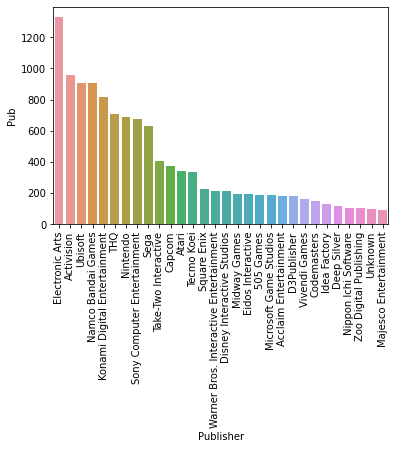

In [ ]:
#출고량이 높은 게임에 대한 분석 및 시각화(네개의 지역을 더해서 출고량 순서대로 세우기)

#game1['total']=game[]

#회사별 게임 갯수
cou=game.groupby(['Publisher'])['Publisher'].count()
cou=pd.DataFrame(cou)
cou['Pub']=cou['Publisher']
cou=cou.sort_values(by='Pub',ascending=False)
cou=cou.head(30)
plt.xticks(rotation=90)
sns.barplot(data=cou,x=cou.index,y='Pub')


In [ ]:
#지역별 판매량을 합쳐서 Total 값 만들어주기
game_T=game.sort_values(by='NA_Sales', ascending=False)
game_T['Total']=game_T['NA_Sales']+game_T['EU_Sales']+game_T['JP_Sales']+game_T['Other_Sales']
game_T=game_T.sort_values(by='Total', ascending=False)
game_T=game_T.head(30)
game_T


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
2843,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
4095,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
12262,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3273,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
7638,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
1181,Tetris,GB,1989,Puzzle,Nintendo,23200.0,2260.0,4220.0,580.0,30260.0
6767,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380.0,9230.0,6500.0,2900.0,30010.0
2947,Wii Play,Wii,2006,Misc,Nintendo,14030.0,9200.0,2930.0,2850.0,29010.0
16112,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590.0,7060.0,4700.0,2260.0,28610.0
10232,Duck Hunt,NES,1984,Shooter,Nintendo,26930.0,630.0,280.0,470.0,28310.0


                             Total
Publisher                         
Nintendo                        22
Take-Two Interactive             4
Activision                       2
Microsoft Game Studios           1
Sony Computer Entertainment      1
([<matplotlib.patches.Wedge object at 0x7f9f7931e350>, <matplotlib.patches.Wedge object at 0x7f9f791d7350>, <matplotlib.patches.Wedge object at 0x7f9f7935e190>, <matplotlib.patches.Wedge object at 0x7f9f7935e150>, <matplotlib.patches.Wedge object at 0x7f9f7a029310>], [Text(-0.7360437078139774, 0.8174592712713291, 'Nintendo'), Text(0.3399188211458418, -1.0461621265515308, 'Take-Two Interactive'), Text(0.8899187936962865, -0.6465636400433808, 'Activision'), Text(1.0461622260061638, -0.3399185150559298, 'Microsoft Game Studios'), Text(1.0939741058077594, -0.11498111071873139, 'Sony Computer Entertainment')], [Text(-0.4014783860803513, 0.44588687523890674, '73.3%'), Text(0.18541026607955005, -0.5706338872099259, '13.3%'), Text(0.48541025110706526, -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


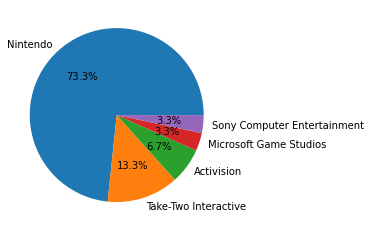

In [ ]:
#판매량 상위 30개 중 회사별 차지하는 비율
game_TP=game_T.groupby(['Publisher'])['Total'].count()
game_TP=pd.DataFrame(game_TP)
game_TP=game_TP.sort_values(by='Total', ascending=False)
print(game_TP)
print(plt.pie(game_TP,labels=game_TP.index,autopct='%1.1f%%'))


([<matplotlib.patches.Wedge object at 0x7f9f794e47d0>, <matplotlib.patches.Wedge object at 0x7f9f794e4f10>, <matplotlib.patches.Wedge object at 0x7f9f79387350>, <matplotlib.patches.Wedge object at 0x7f9f79388050>, <matplotlib.patches.Wedge object at 0x7f9f79388a50>, <matplotlib.patches.Wedge object at 0x7f9f7939b310>, <matplotlib.patches.Wedge object at 0x7f9f7939b910>, <matplotlib.patches.Wedge object at 0x7f9f793ab110>, <matplotlib.patches.Wedge object at 0x7f9f79388850>], [Text(0.8899186877588753, 0.6465637858537406, 'Platform'), Text(-0.11498135397869183, 1.0939740802401248, 'Action'), Text(-0.8899187482945419, 0.6465637025335369, 'Role-Playing'), Text(-1.0759623315431446, -0.2287029975759841, 'Sports'), Text(-0.6465636400433808, -0.8899187936962865, 'Misc'), Text(1.8023150729406385e-07, -1.0999999999999852, 'Racing'), Text(0.6465639316640834, -0.8899185818214397, 'Shooter'), Text(1.004900087884155, -0.44741011764422317, 'Puzzle'), Text(1.0939741084990864, -0.11498108511241965, 'Si

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


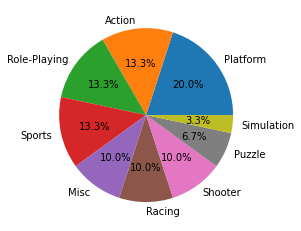

In [ ]:
#판매량 상위 30개 중 장르별 차지하는 비율
game_TG=game_T.groupby(['Genre'])['Total'].count()
game_TG=pd.DataFrame(game_TG)


game_TG=game_TG.sort_values(by='Total', ascending=False)
print(plt.pie(game_TG,labels=game_TG.index,autopct='%1.1f%%'))

([<matplotlib.patches.Wedge object at 0x7f9f79256210>, <matplotlib.patches.Wedge object at 0x7f9f79256ad0>, <matplotlib.patches.Wedge object at 0x7f9f79245410>, <matplotlib.patches.Wedge object at 0x7f9f79245c90>, <matplotlib.patches.Wedge object at 0x7f9f79267790>, <matplotlib.patches.Wedge object at 0x7f9f792770d0>, <matplotlib.patches.Wedge object at 0x7f9f79277750>, <matplotlib.patches.Wedge object at 0x7f9f79277f90>, <matplotlib.patches.Wedge object at 0x7f9f79267590>, <matplotlib.patches.Wedge object at 0x7f9f79267e90>, <matplotlib.patches.Wedge object at 0x7f9f79641b50>, <matplotlib.patches.Wedge object at 0x7f9f79717f90>, <matplotlib.patches.Wedge object at 0x7f9f79739810>, <matplotlib.patches.Wedge object at 0x7f9f7973c090>, <matplotlib.patches.Wedge object at 0x7f9f7973c8d0>, <matplotlib.patches.Wedge object at 0x7f9f79738190>, <matplotlib.patches.Wedge object at 0x7f9f79738bd0>, <matplotlib.patches.Wedge object at 0x7f9f7940e190>], [Text(1.0048999936326264, 0.447410329336670

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


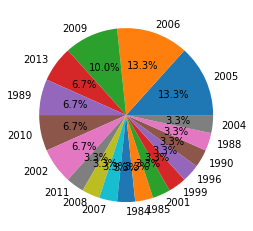

In [ ]:
#판매량 상위 30개 중 연도별 차지하는 비율
game_TY=game_T.groupby(['Year'])['Total'].count()
game_TY=pd.DataFrame(game_TY)
game_TY=game_TY.sort_values(by='Total', ascending=False)
print(plt.pie(game_TY,labels=game_TY.index,autopct='%1.1f%%'))

([<matplotlib.patches.Wedge object at 0x7f9f7937ea50>, <matplotlib.patches.Wedge object at 0x7f9f793623d0>, <matplotlib.patches.Wedge object at 0x7f9f79362bd0>, <matplotlib.patches.Wedge object at 0x7f9f7935f410>, <matplotlib.patches.Wedge object at 0x7f9f7935fe90>, <matplotlib.patches.Wedge object at 0x7f9f7934d650>, <matplotlib.patches.Wedge object at 0x7f9f7934dc50>, <matplotlib.patches.Wedge object at 0x7f9f7990b450>, <matplotlib.patches.Wedge object at 0x7f9f7935fc10>], [Text(0.817459305728021, 0.7360436695459462, 'Wii'), Text(-0.5500000148652439, 0.9526279355804299, 'DS'), Text(-1.0999999999999988, -5.149471622296949e-08, 'GB'), Text(-0.7360435930098791, -0.8174593746413993, 'X360'), Text(1.2873679044788556e-07, -1.0999999999999925, 'NES'), Text(0.646563890003987, -0.8899186120892812, 'PS2'), Text(0.9526280192593349, -0.5499998699291085, 'GBA'), Text(1.0461622180497963, -0.33991853954312456, 'PS3'), Text(1.093974103116432, -0.11498113632504307, 'SNES')], [Text(0.44588689403346593

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


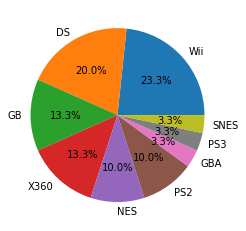

In [ ]:
#판매량 상위 30개 중 플랫폼별 차지하는 비율
game_TP=game_T.groupby(['Platform'])['Total'].count()
game_TP=pd.DataFrame(game_TP)
game_TP=game_TP.sort_values(by='Total', ascending=False)
print(plt.pie(game_TP,labels=game_TP.index,autopct='%1.1f%%'))

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
3400,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010.0,9270.0,970.0,4140.0,21390.0
10644,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630.0,5310.0,60.0,1380.0,16380.0
2746,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030.0,4280.0,130.0,1320.0,14760.0
8851,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770.0,5810.0,350.0,2310.0,14240.0
4134,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4990.0,5880.0,650.0,2520.0,14040.0
6229,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8250.0,4300.0,70.0,1120.0,13740.0
13762,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540.0,5820.0,490.0,1620.0,13470.0
10849,Mario Kart 7,3DS,2011,Racing,Nintendo,4740.0,3910.0,2670.0,890.0,12210.0
1967,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800.0,5810.0,360.0,2020.0,11990.0
4145,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4230.0,3370.0,3080.0,650.0,11330.0


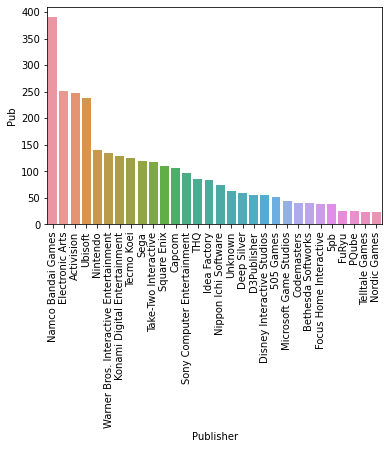

In [ ]:
#연도를 체크하니까 'Year'이 최근이 아님
#'Year'을 최근(2011-2020)으로 설정한 후 다시 시각화

game_T2=game.sort_values(by='NA_Sales', ascending=False)
condition2= game_T2.loc[(game_T2['Year']<2011)].index
game_T2=game_T2.drop(condition2)


#회사별 게임 갯수
cou2=game_T2.groupby(['Publisher'])['Publisher'].count()
cou2=pd.DataFrame(cou2)
cou2['Pub']=cou2['Publisher']
cou2=cou2.sort_values(by='Pub',ascending=False)
cou2=cou2.head(30)
plt.xticks(rotation=90)
sns.barplot(data=cou2,x=cou2.index,y='Pub')

game_T2['Total']=game_T2['NA_Sales']+game_T2['EU_Sales']+game_T2['JP_Sales']+game_T2['Other_Sales']
game_T2=game_T2.sort_values(by='Total', ascending=False)
game_T2=game_T2.head(30)

game_T2

                        Total
Publisher                    
Activision                  9
Nintendo                    8
Electronic Arts             5
Take-Two Interactive        3
Microsoft Game Studios      2
Ubisoft                     2
Bethesda Softworks          1
([<matplotlib.patches.Wedge object at 0x7f9f79648850>, <matplotlib.patches.Wedge object at 0x7f9f798628d0>, <matplotlib.patches.Wedge object at 0x7f9f792ca350>, <matplotlib.patches.Wedge object at 0x7f9f792cac10>, <matplotlib.patches.Wedge object at 0x7f9f7987d610>, <matplotlib.patches.Wedge object at 0x7f9f7985a550>, <matplotlib.patches.Wedge object at 0x7f9f7985a790>], [Text(0.6465637441936395, 0.8899187180267095, 'Activision'), Text(-1.0049000564669839, 0.4474101882083744, 'Nintendo'), Text(-0.6465636192133282, -0.8899188088302002, 'Electronic Arts'), Text(0.22870307313013108, -1.075962315483602, 'Take-Two Interactive'), Text(0.7360438417520737, -0.8174591506728937, 'Microsoft Game Studios'), Text(1.0049001088289329, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


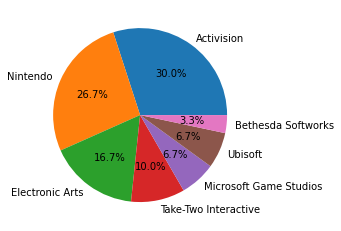

In [ ]:
#판매량 상위 30개 중 회사별 차지하는 비율
game_TP2=game_T2.groupby(['Publisher'])['Total'].count()
game_TP2=pd.DataFrame(game_TP2)
game_TP2=game_TP2.sort_values(by='Total', ascending=False)
print(game_TP2)
print(plt.pie(game_TP2,labels=game_TP2.index,autopct='%1.1f%%'))

([<matplotlib.patches.Wedge object at 0x7f9f79362450>, <matplotlib.patches.Wedge object at 0x7f9f793622d0>, <matplotlib.patches.Wedge object at 0x7f9f7936a710>, <matplotlib.patches.Wedge object at 0x7f9f7936a150>, <matplotlib.patches.Wedge object at 0x7f9f794078d0>, <matplotlib.patches.Wedge object at 0x7f9f7937ee10>, <matplotlib.patches.Wedge object at 0x7f9f7937e390>, <matplotlib.patches.Wedge object at 0x7f9f79921dd0>, <matplotlib.patches.Wedge object at 0x7f9f79407150>], [Text(0.2287028464676864, 1.0759623636622138, 'Shooter'), Text(-1.0999999999999988, -5.149471622296949e-08, 'Action'), Text(-0.8174592540429827, -0.7360437269479921, 'Misc'), Text(-0.22870277091353564, -1.0759623797217406, 'Role-Playing'), Text(0.33991879665865016, -1.0461621345079049, 'Platform'), Text(0.7360437652160211, -0.817459219586288, 'Racing'), Text(0.9526280192593349, -0.5499998699291085, 'Fighting'), Text(1.0461622180497963, -0.33991853954312456, 'Simulation'), Text(1.093974103116432, -0.1149811363250430

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


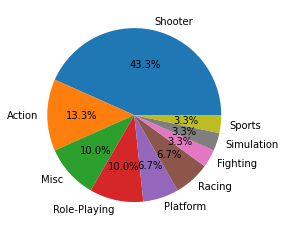

In [ ]:
#판매량 상위 30개 중 장르별 차지하는 비율
game_TG2=game_T2.groupby(['Genre'])['Total'].count()
game_TG2=pd.DataFrame(game_TG2)

game_TG2=game_TG2.sort_values(by='Total', ascending=False)
print(plt.pie(game_TG2,labels=game_TG2.index,autopct='%1.1f%%'))

([<matplotlib.patches.Wedge object at 0x7f9f7935e950>, <matplotlib.patches.Wedge object at 0x7f9f7a11d190>, <matplotlib.patches.Wedge object at 0x7f9f79374b90>, <matplotlib.patches.Wedge object at 0x7f9f79374950>, <matplotlib.patches.Wedge object at 0x7f9f7a18e2d0>], [Text(0.7360436312779136, 0.817459340184711, '2012'), Text(-0.8174593746413993, 0.7360435930098791, '2011'), Text(-0.952627884085708, -0.5500001040567056, '2013'), Text(1.5448414935947287e-07, -1.0999999999999892, '2014'), Text(0.9526280385698485, -0.5499998364823061, '2015')], [Text(0.4014783443334074, 0.4458869128280241, '26.7%'), Text(-0.44588693162258136, 0.401478323459934, '23.3%'), Text(-0.5196152095012951, -0.30000005675820307, '16.7%'), Text(8.426408146880338e-08, -0.5999999999999941, '16.7%'), Text(0.5196152937653719, -0.29999991080853056, '16.7%')])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


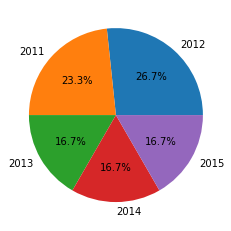

In [ ]:
#판매량 상위 30개 중 연도별 차지하는 비율
game_TY2=game_T2.groupby(['Year'])['Total'].count()
game_TY2=pd.DataFrame(game_TY2)
game_TY2=game_TY2.sort_values(by='Total', ascending=False)
print(plt.pie(game_TY2,labels=game_TY2.index,autopct='%1.1f%%'))

([<matplotlib.patches.Wedge object at 0x7f9f79829790>, <matplotlib.patches.Wedge object at 0x7f9f79829490>, <matplotlib.patches.Wedge object at 0x7f9f7989f390>, <matplotlib.patches.Wedge object at 0x7f9f798ccc50>, <matplotlib.patches.Wedge object at 0x7f9f798cc690>, <matplotlib.patches.Wedge object at 0x7f9f7989c910>, <matplotlib.patches.Wedge object at 0x7f9f7989c550>, <matplotlib.patches.Wedge object at 0x7f9f796b6690>], [Text(0.817459305728021, 0.7360436695459462, 'X360'), Text(-0.5500000148652439, 0.9526279355804299, '3DS'), Text(-1.0759623529558597, -0.22870289683711933, 'PS3'), Text(-0.1149812515534462, -1.0939740910054512, 'PS4'), Text(0.7360437269479921, -0.8174592540429828, 'Wii'), Text(0.9526279935119821, -0.5499999145248435, 'DS'), Text(1.04616220213706, -0.33991858851751156, 'WiiU'), Text(1.0939740977337755, -0.11498118753766719, 'XOne')], [Text(0.44588689403346593, 0.40147836520687974, '23.3%'), Text(-0.3000000081083148, 0.5196152375893254, '20.0%'), Text(-0.58688855615774

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


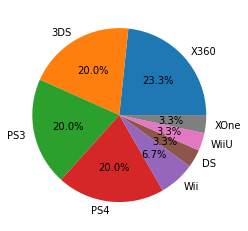

In [ ]:
#판매량 상위 30개 중 플랫폼별 차지하는 비율
game_TP2=game_T2.groupby(['Platform'])['Total'].count()
game_TP2=pd.DataFrame(game_TP2)
game_TP2=game_TP2.sort_values(by='Total', ascending=False)
print(plt.pie(game_TP2,labels=game_TP2.index,autopct='%1.1f%%'))

In [ ]:
#지역별 판매량간 상관계수 찾아보기
cor=game.drop(['Year'],axis=1)
cor=cor.corr()
cor.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.767921,0.448453,0.633502
EU_Sales,0.767921,1.000000,0.431446,0.727111
JP_Sales,0.448453,0.431446,1.000000,0.284445
Other_Sales,0.633502,0.727111,0.284445,1.000000


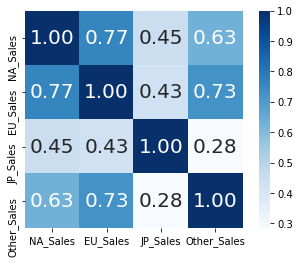

In [ ]:
sns.heatmap(cor, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')
